<a href="https://colab.research.google.com/github/MuBuBaamm/EfficientNet/blob/main/test_efficientnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from google.colab import drive

drive.mount ('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/dataset_parasite'

/content/drive/MyDrive/dataset_parasite


In [4]:
import pathlib

dataset_parasite = ('/content/drive/MyDrive/dataset_parasite')
data_dir = pathlib.Path(dataset_parasite)

In [5]:
batch_size = 64
img_height = 224
img_width = 224

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_parasite,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_parasite,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 453 files belonging to 9 classes.
Using 363 files for training.
Found 453 files belonging to 9 classes.
Using 90 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Artifact', 'Ascaris lumbricoides', 'Echinostoma spp', 'Enterobius vermicularis', 'Hookworms', 'Minute Intestinal Fluke', 'Opisthorchis viverini', 'Taenia spp', 'Trichuris trichiura']


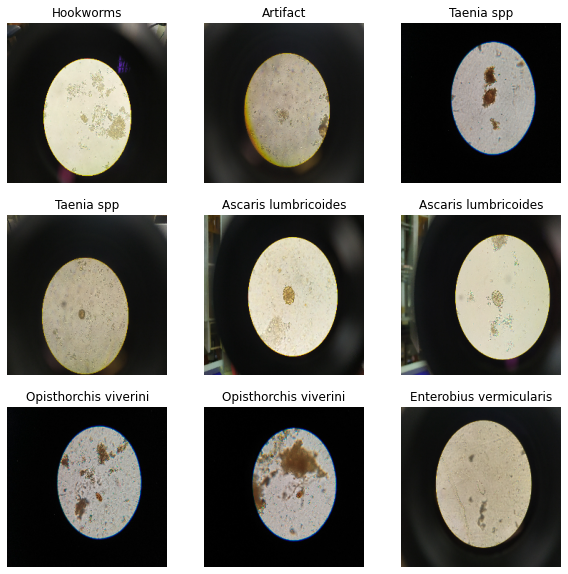

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [10]:
from keras.models import load_model

model_path = '/content/drive/My Drive/efficientnet/efficientnet.model'
model = tf.keras.models.load_model(model_path, compile=True)

In [11]:
import numpy as np
from IPython.display import Image

def model_predict(path):
    img = keras.preprocessing.image.load_img(path, target_size=(224, 224))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    display(Image(filename=path))
    print("{} {:.2f} %".format(class_names[np.argmax(score)], 100 * np.max(score)))

In [12]:
img = keras.preprocessing.image.load_img('/content/drive/MyDrive/Enterobius.JPG', target_size=(224, 224))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(score)

tf.Tensor(
[0.0976128  0.13619898 0.09917509 0.09778775 0.10109507 0.09767904
 0.09858001 0.16849187 0.10337939], shape=(9,), dtype=float32)


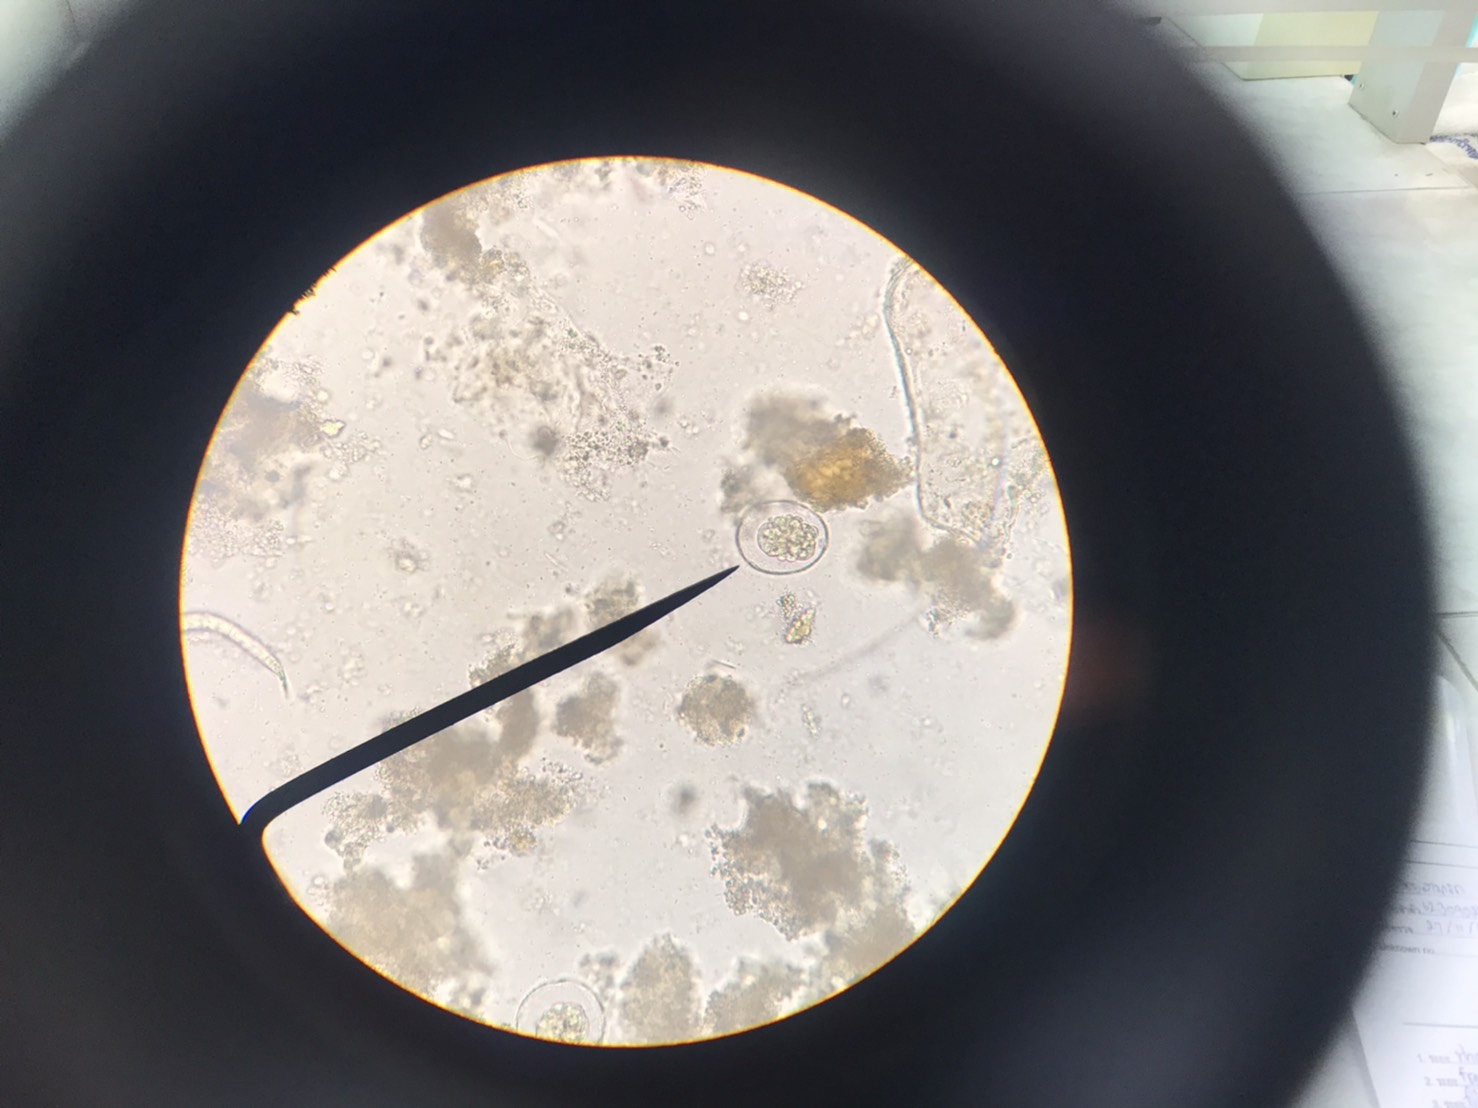

Taenia spp 16.85 %


In [13]:
model_predict('/content/drive/MyDrive/Enterobius.JPG')